import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/triggertray/Predict_zindi/master/Train.csv')
train.columns = [col.replace(' ', '_') for col in train.columns]

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/triggertray/Predict_zindi/master/Test.csv')
test.columns = [col.replace(' ', '_')for col in test.columns]

In [ ]:
train1 = train.copy(deep=True)
test1 = test.copy(deep=True)

In [ ]:
#which variables are statitically relevant to arrival time?

covariance_og = train.corr()['Time_from_Pickup_to_Arrival'].sort_values(ascending = False)
covariance_og

Time_from_Pickup_to_Arrival                  1.000000
Distance_(KM)                                0.580608
Destination_Long                             0.070425
Pickup_Long                                  0.060285
Precipitation_in_millimeters                 0.024756
Arrival_at_Pickup_-_Weekday_(Mo_=_1)         0.009744
Confirmation_-_Weekday_(Mo_=_1)              0.009744
Arrival_at_Destination_-_Weekday_(Mo_=_1)    0.009744
Pickup_-_Weekday_(Mo_=_1)                    0.009744
Placement_-_Weekday_(Mo_=_1)                 0.009693
Temperature                                  0.006465
Platform_Type                               -0.003827
Pickup_-_Day_of_Month                       -0.014701
Arrival_at_Pickup_-_Day_of_Month            -0.014701
Confirmation_-_Day_of_Month                 -0.014701
Arrival_at_Destination_-_Day_of_Month       -0.014701
Placement_-_Day_of_Month                    -0.014710
Pickup_Lat                                  -0.053823
Destination_Lat             

In [ ]:
train1 = train1[['Pickup_-_Weekday_(Mo_=_1)',
'Precipitation_in_millimeters','Distance_(KM)','Time_from_Pickup_to_Arrival' ]]

test1 = test1[['Pickup_-_Weekday_(Mo_=_1)',
'Precipitation_in_millimeters','Distance_(KM)']]


In [ ]:
print(train1.info())
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pickup_-_Weekday_(Mo_=_1)     21201 non-null  int64  
 1   Precipitation_in_millimeters  552 non-null    float64
 2   Distance_(KM)                 21201 non-null  int64  
 3   Time_from_Pickup_to_Arrival   21201 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 662.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pickup_-_Weekday_(Mo_=_1)     7068 non-null   int64  
 1   Precipitation_in_millimeters  199 non-null    float64
 2   Distance_(KM)                 7068 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 165.8 KB
None


In [ ]:
#make dummies for weekday and weekend traffic
train1['Pickup_-_Weekday_(Mo_=_1)'] = train1['Pickup_-_Weekday_(Mo_=_1)'].replace([1,2,3,4,5],0) #only run this once!!
train1['Pickup_-_Weekday_(Mo_=_1)'] = train1['Pickup_-_Weekday_(Mo_=_1)'].replace([6,7],1)

# make dummy (0) for days with no rain
train1['Precipitation_in_millimeters'] = train1['Precipitation_in_millimeters'].fillna(int(0))

# make dummy (1) for rainy days
train1.loc[train1['Precipitation_in_millimeters'] >0] = int(1)

In [ ]:
print(train1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pickup_-_Weekday_(Mo_=_1)     21201 non-null  int64  
 1   Precipitation_in_millimeters  21201 non-null  float64
 2   Distance_(KM)                 21201 non-null  int64  
 3   Time_from_Pickup_to_Arrival   21201 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 662.7 KB
None


In [ ]:
#make dummies for weekday and weekend traffic
test1['Pickup_-_Weekday_(Mo_=_1)'] = test1['Pickup_-_Weekday_(Mo_=_1)'].replace([1,2,3,4,5],0) #only run this once!!!!!
test1['Pickup_-_Weekday_(Mo_=_1)'] = test1['Pickup_-_Weekday_(Mo_=_1)'].replace([6,7],1)

# no rain day get dummy 0
test1['Precipitation_in_millimeters'] = test1['Precipitation_in_millimeters'].fillna(int(0))

# rain days get dummy 1
test1.loc[test1['Precipitation_in_millimeters'] >0] = int(1)

In [ ]:
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pickup_-_Weekday_(Mo_=_1)     7068 non-null   int64  
 1   Precipitation_in_millimeters  7068 non-null   float64
 2   Distance_(KM)                 7068 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 165.8 KB
None


In [ ]:
print(test1['Precipitation_in_millimeters'].value_counts())
print(test1['Pickup_-_Weekday_(Mo_=_1)'].value_counts())
print(train1['Precipitation_in_millimeters'].value_counts())
print(train1['Pickup_-_Weekday_(Mo_=_1)'].value_counts())

0.0    6869
1.0     199
Name: Precipitation_in_millimeters, dtype: int64
0    6385
1     683
Name: Pickup_-_Weekday_(Mo_=_1), dtype: int64
0.0    20649
1.0      552
Name: Precipitation_in_millimeters, dtype: int64
0    19260
1     1941
Name: Pickup_-_Weekday_(Mo_=_1), dtype: int64


In [ ]:
test1['Time_from_Pickup_to_Arrival'] = np.nan


In [ ]:
test1['Time_from_Pickup_to_Arrival'].unique()
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pickup_-_Weekday_(Mo_=_1)     7068 non-null   int64  
 1   Precipitation_in_millimeters  7068 non-null   float64
 2   Distance_(KM)                 7068 non-null   int64  
 3   Time_from_Pickup_to_Arrival   0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 221.0 KB


In [ ]:
cov = train1.corr()#['Time_from_Pickup_to_Arrival']
cov

,Pickup_-_Weekday_(Mo_=_1),Precipitation_in_millimeters,Distance_(KM),Time_from_Pickup_to_Arrival
Pickup_-_Weekday_(Mo_=_1),1.000000,0.515033,-0.102984,-0.145553
Precipitation_in_millimeters,0.515033,1.000000,-0.235122,-0.246115
Distance_(KM),-0.102984,-0.235122,1.000000,0.603615
Time_from_Pickup_to_Arrival,-0.145553,-0.246115,0.603615,1.000000


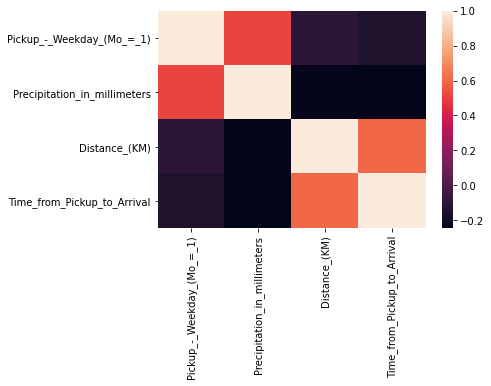

In [ ]:
sns.heatmap(cov)
plt.show()

In [ ]:
##TRAIN MODEL WITH TRAIN1

x = train1.drop('Time_from_Pickup_to_Arrival', axis=1)
y = train1['Time_from_Pickup_to_Arrival']

In [ ]:
lr = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2)

lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

In [ ]:
def rmse(y_test, y_predict):
  return np.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
answer = rmse(y_test, y_preds)
answer

780.1791766597185

In [ ]:
xt = test1.drop('Time_from_Pickup_to_Arrival', axis=1)

lr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
ytest_preds = lr.predict(xt)
ytest_preds

array([1413.95247001, 1110.58924876, 1110.58924876, ..., 1616.19461751,
       2425.1632075 , 1413.95247001])

In [ ]:
daf = pd.DataFrame(ytest_preds, columns=['Time_from_Pickup_to_Arrival'])
daf.head()

,Time_from_Pickup_to_Arrival
0,1413.952470
1,1110.589249
2,1110.589249
3,1110.589249
4,1211.710323


In [ ]:
output = pd.DataFrame({"Order No":test['Order_No']})
submission = output.join(daf)
submission

,Order No,Time_from_Pickup_to_Arrival
0,Order_No_19248,1413.952470
1,Order_No_12736,1110.589249
2,Order_No_768,1110.589249
3,Order_No_15332,1110.589249
4,Order_No_21373,1211.710323
...,...,...
7063,Order_No_3612,1110.589249
7064,Order_No_7657,2829.647503
7065,Order_No_1969,1616.194618
7066,Order_No_10591,2425.163208


In [ ]:
submission.to_csv('submission_10.csv', index=False)

In [ ]:
print('Sendy Submission:', answer)

Sendy Submission: 780.1791766597185
